# GridRival AI: Optimizing F1 Fantasy Teams

This notebook provides a complete guide to using the GridRival AI library for optimizing F1 fantasy teams.

## 1. Introduction

### Welcome to GridRival AI

GridRival AI is a Python library designed to help Formula 1 fans optimize their fantasy teams for the GridRival platform. Using mathematical modeling, probability distributions, and optimization algorithms, this library helps you maximize expected fantasy points while staying within budget constraints.

## Installation

First, let's install the library:

```python
# Install the library directly from GitHub or PyPI
# For now, we'll assume it's already installed
# !pip install gridrival_ai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import key components from gridrival_ai
from gridrival_ai.data.fantasy import FantasyLeagueData
from gridrival_ai.optimization.optimizer import TeamOptimizer
from gridrival_ai.points.calculator import PointsCalculator
from gridrival_ai.probabilities.factory import DistributionFactory
from gridrival_ai.probabilities.registry import DistributionRegistry
from gridrival_ai.scoring.calculator import ScoringCalculator
from gridrival_ai.scoring.config import ScoringConfig
from gridrival_ai.scoring.types import RaceFormat

In [2]:
# Set up visualization style
plt.style.use("seaborn-v0_8-darkgrid")

In [3]:
import gridrival_ai

print(f"GridRival AI version: {gridrival_ai.__version__}")

GridRival AI version: 0.1.0


### Loading Driver and Constructor Data

In [4]:
# Driver salaries (in millions)
driver_salaries = {
    "VER": 29.1,  # Max Verstappen
    "NOR": 28.5,  # Lando Norris
    "LEC": 25.3,  # Charles Leclerc
    "HAM": 23.8,  # Lewis Hamilton
    "PIA": 23.6,  # Oscar Piastri
    "RUS": 23.0,  # George Russell
    "ANT": 21.2,  # Andrea Kimi Antonelli
    "LAW": 19.6,  # Liam Lawson
    "TSU": 17.4,  # Yuki Tsunoda
    "ALO": 16.8,  # Fernando Alonso
    "GAS": 16.0,  # Pierre Gasly
    "ALB": 13.8,  # Alex Albon
    "OCO": 13.1,  # Esteban Ocon
    "SAI": 12.6,  # Carlos Sainz
    "BEA": 10.5,  # Oliver Bearman
    "HUL": 9.6,  # Nico Hulkenberg
    "STR": 8.2,  # Lance Stroll
    "HAD": 7.0,  # Isack Hadjar
    "BOR": 4.4,  # Gabriel Bortoleto
    "DOO": 4.2,  # Jack Doohan
}

# Updated constructor salaries (in millions) from screenshots
constructor_salaries = {
    "MCL": 30.0,  # McLaren
    "FER": 26.5,  # Ferrari
    "RBR": 23.7,  # Red Bull Racing
    "MER": 23.0,  # Mercedes
    "AST": 18.1,  # Aston Martin
    "WIL": 14.6,  # Williams
    "HAA": 13.9,  # Haas (from additional screenshot)
    "RBU": 9.0,  # Racing Bulls (from additional screenshot)
    "ALP": 8.3,  # Alpine (from additional screenshot)
    "SAU": 6.9,  # Kick Sauber (from additional screenshot)
}

# Driver's 8-race rolling average finish positions (could be updated with more accurate data)
rolling_averages = {
    "VER": 2,
    "NOR": 2,
    "LEC": 4,
    "HAM": 5,
    "PIA": 6,
    "RUS": 6,
    "ANT": 8,
    "LAW": 8,
    "TSU": 11,
    "ALO": 10,
    "GAS": 11,
    "ALB": 13,
    "OCO": 13,
    "SAI": 13,
    "BEA": 15,
    "HUL": 16,
    "STR": 17,
    "HAD": 17,
    "BOR": 20,
    "DOO": 19,
}

C:\Users\pablo\AppData\Local\Temp\ipykernel_8616\1910497958.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["Driver"], rotation=45, ha="right")
C:\Users\pablo\AppData\Local\Temp\ipykernel_8616\1910497958.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df["Driver"], rotation=45, ha="right")


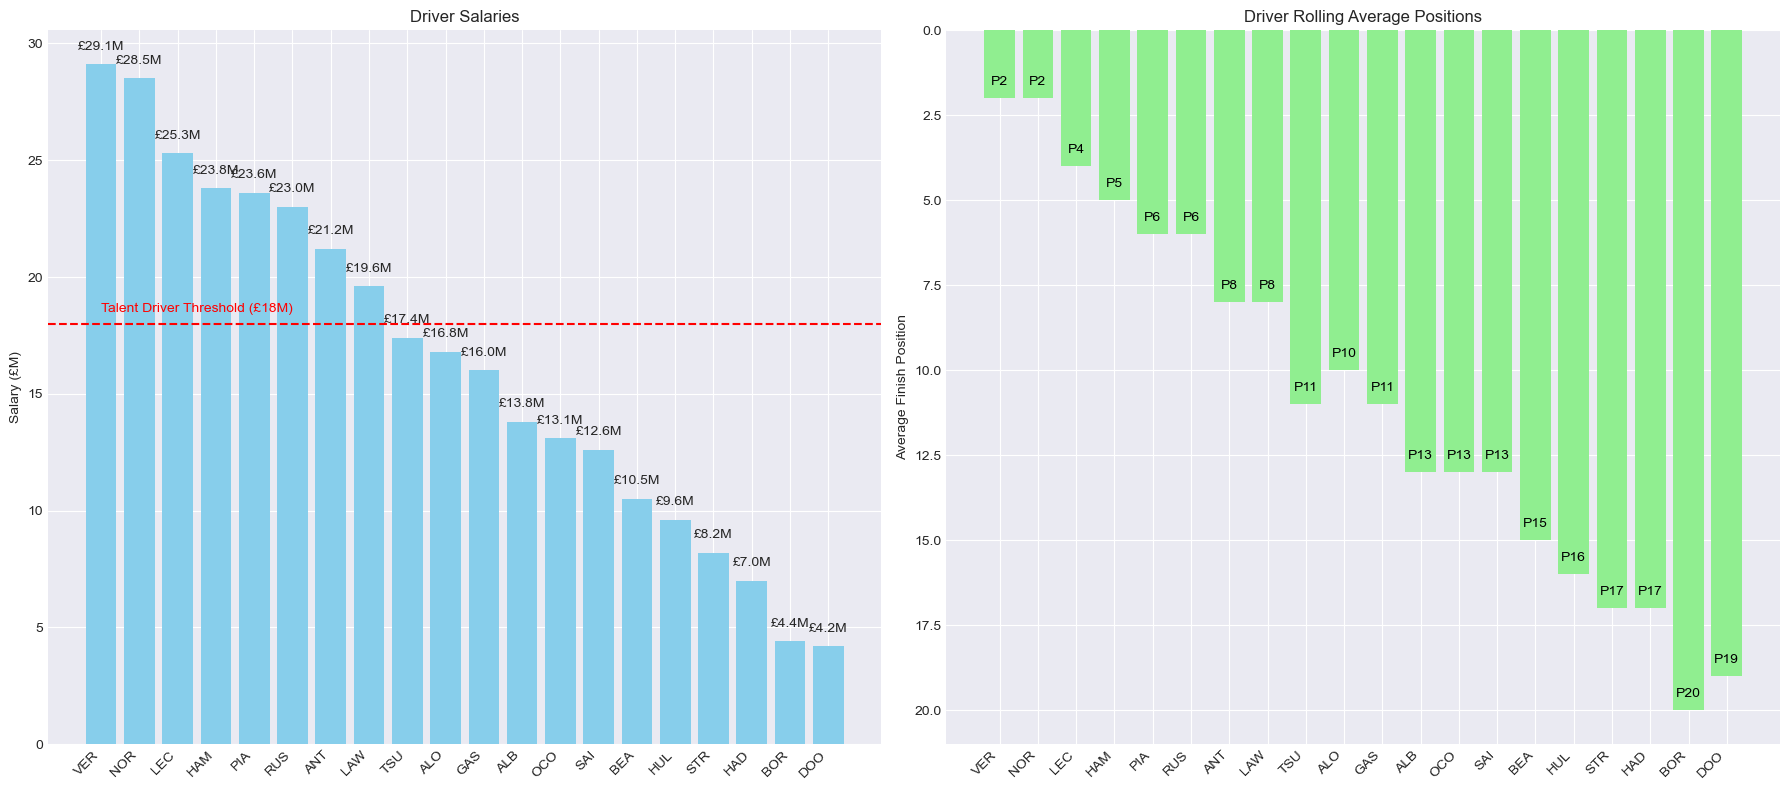

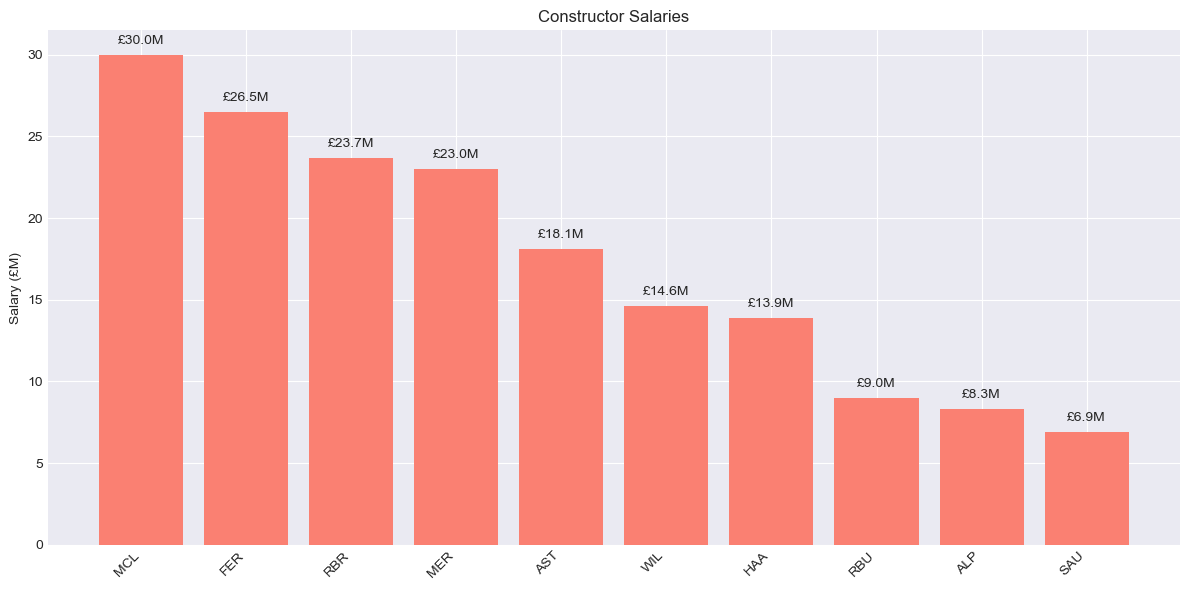

In [5]:
# Visualize driver salaries and rolling averages
def plot_drivers_data():
    # Create a dataframe for visualization
    df = pd.DataFrame(
        {
            "Driver": list(driver_salaries.keys()),
            "Salary (£M)": list(driver_salaries.values()),
            "Avg Position": [rolling_averages[d] for d in driver_salaries],
        }
    )

    # Sort by salary for better visualization
    df = df.sort_values("Salary (£M)", ascending=False)

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    # Plot salaries
    bars = ax1.bar(df["Driver"], df["Salary (£M)"], color="skyblue")
    ax1.set_ylabel("Salary (£M)")
    ax1.set_title("Driver Salaries")
    ax1.set_xticklabels(df["Driver"], rotation=45, ha="right")
    ax1.axhline(y=18.0, color="red", linestyle="--")
    ax1.text(0, 18.5, "Talent Driver Threshold (£18M)", color="red")

    # Add salary values on top of bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.5,
            f"£{height:.1f}M",
            ha="center",
            va="bottom",
        )

    # Plot rolling averages
    bars = ax2.bar(df["Driver"], df["Avg Position"], color="lightgreen")
    ax2.set_ylabel("Average Finish Position")
    ax2.set_title("Driver Rolling Average Positions")
    ax2.set_xticklabels(df["Driver"], rotation=45, ha="right")
    ax2.invert_yaxis()  # Lower position is better

    # Add position values on bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(
            bar.get_x() + bar.get_width() / 2.0,
            height - 0.3,
            f"P{height:.0f}",
            ha="center",
            va="bottom",
            color="black",
        )

    plt.tight_layout()
    plt.show()


plot_drivers_data()

# Now visualize constructor salaries
plt.figure(figsize=(12, 6))
constructors = list(constructor_salaries.keys())
salaries = list(constructor_salaries.values())

# Sort by salary
sorted_indices = np.argsort(salaries)[::-1]
constructors = [constructors[i] for i in sorted_indices]
salaries = [salaries[i] for i in sorted_indices]

bars = plt.bar(constructors, salaries, color="salmon")
plt.ylabel("Salary (£M)")
plt.title("Constructor Salaries")
plt.xticks(rotation=45, ha="right")

# Add salary values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.5,
        f"£{height:.1f}M",
        ha="center",
        va="bottom",
    )

plt.tight_layout()
plt.show()

## 2. Data Preparation

### Working with Fantasy League Data

GridRival AI uses a centralized `FantasyLeagueData` class to store and manage all the necessary data for optimization. This class combines:
- Driver and constructor salaries
- Driver performance statistics (rolling averages)
- Team constraints (locked-in and locked-out elements)

Let's set up our fantasy league data using the sample data:

In [6]:
# Create the FantasyLeagueData object using the factory method
fantasy_data = FantasyLeagueData.from_dicts(
    driver_salaries=driver_salaries,
    constructor_salaries=constructor_salaries,
    rolling_averages=rolling_averages,
    locked_in={"ALB", "SAI", "STR", "HAD"},
    locked_out={"LEC", "MCL"},
)

# Examine what drivers are available
available_drivers = fantasy_data.get_available_drivers()
print(f"Number of available drivers: {len(available_drivers)}")
print(f"Available drivers: {', '.join(sorted(available_drivers))}")

# Examine what constructors are available
available_constructors = fantasy_data.get_available_constructors()
print(f"Number of available constructors: {len(available_constructors)}")
print(f"Available constructors: {', '.join(sorted(available_constructors))}")

Number of available drivers: 19
Available drivers: ALB, ALO, ANT, BEA, BOR, DOO, GAS, HAD, HAM, HUL, LAW, NOR, OCO, PIA, RUS, SAI, STR, TSU, VER
Number of available constructors: 9
Available constructors: ALP, AST, FER, HAA, MER, RBR, RBU, SAU, WIL


In [7]:
# Create a new fantasy data object with constraints
constrained_data = FantasyLeagueData.from_dicts(
    driver_salaries=driver_salaries,
    constructor_salaries=constructor_salaries,
    rolling_averages=rolling_averages,
    locked_in={"NOR", "FER"},  # Lock in Norris and Ferrari
    locked_out={"VER", "STR"},  # Lock out Verstappen and Stroll
)

# Check which drivers are now available
available_drivers = constrained_data.get_available_drivers()
print(f"Number of available drivers: {len(available_drivers)}")
print(f"Available drivers: {', '.join(sorted(available_drivers))}")

# Verify our locked in/out constraints
print("\nLocked-in elements:")
print(constrained_data.constraints.locked_in)

print("\nLocked-out elements:")
print(constrained_data.constraints.locked_out)


# Check if a specific driver is available
def is_available(element_id, fantasy_data):
    if element_id in fantasy_data.salaries.drivers:
        return element_id in fantasy_data.get_available_drivers()
    elif element_id in fantasy_data.salaries.constructors:
        return element_id in fantasy_data.get_available_constructors()
    else:
        return False


print(f"\nIs Verstappen (VER) available? {is_available('VER', constrained_data)}")
print(f"Is Norris (NOR) available? {is_available('NOR', constrained_data)}")

Number of available drivers: 18
Available drivers: ALB, ALO, ANT, BEA, BOR, DOO, GAS, HAD, HAM, HUL, LAW, LEC, NOR, OCO, PIA, RUS, SAI, TSU

Locked-in elements:
frozenset({'NOR', 'FER'})

Locked-out elements:
frozenset({'STR', 'VER'})

Is Verstappen (VER) available? False
Is Norris (NOR) available? True


In [8]:
# Betting odds for driver to win the sprint race (in decimal)
sprint_winning_odds = {
    "NOR": 2.00,  # Lando Norris
    "PIA": 4.33,  # Oscar Piastri
    "VER": 5.00,  # Max Verstappen
    "RUS": 17.00,  # George Russell
    "LEC": 19.00,  # Charles Leclerc
    "HAM": 23.00,  # Lewis Hamilton
    "ANT": 51.00,  # Andrea Kimi Antonelli
    "ALB": 151.00,  # Alex Albon
    "SAI": 151.00,  # Carlos Sainz
    "LAW": 151.00,  # Liam Lawson
    "GAS": 151.00,  # Pierre Gasly
    "TSU": 151.00,  # Yuki Tsunoda
    "ALO": 326.00,  # Fernando Alonso
    "STR": 326.00,  # Lance Stroll
    "HUL": 326.00,  # Nico Hulkenberg
    "OCO": 501.00,  # Esteban Ocon
    "BOR": 501.00,  # Gabriel Bortoleto
    "HAD": 501.00,  # Isack Hadjar
    "DOO": 501.00,  # Jack Doohan
    "BEA": 501.00,  # Oliver Bearman
}

# Betting odds for sprint top 6 finish (in decimal)
sprint_top6_odds = {
    "NOR": 1.05,  # Lando Norris
    "VER": 1.05,  # Max Verstappen
    "PIA": 1.08,  # Oscar Piastri
    "LEC": 1.08,  # Charles Leclerc
    "RUS": 1.22,  # George Russell
    "HAM": 1.40,  # Lewis Hamilton
    "ANT": 1.73,  # Andrea Kimi Antonelli
    "ALB": 3.25,  # Alex Albon
    "SAI": 3.25,  # Carlos Sainz
    "LAW": 9.00,  # Liam Lawson
    "GAS": 9.00,  # Pierre Gasly
    "TSU": 9.00,  # Yuki Tsunoda
    "ALO": 15.00,  # Fernando Alonso
    "STR": 34.00,  # Lance Stroll
    "HUL": 34.00,  # Nico Hulkenberg
    "OCO": 101.00,  # Esteban Ocon
    "BOR": 151.00,  # Gabriel Bortoleto
    "HAD": 151.00,  # Isack Hadjar
    "DOO": 151.00,  # Jack Doohan
    "BEA": 151.00,  # Oliver Bearman
}

# Betting odds for qualifying win (in decimal) - dark blue values from image
qualifying_win_odds = {
    "NOR": 1.33,  # Lando Norris
    "PIA": 1.45,  # Oscar Piastri (using the dark blue value)
    "VER": 1.60,  # Max Verstappen
    "LEC": 2.75,  # Charles Leclerc
    "RUS": 3.25,  # George Russell (using the dark blue value)
    "HAM": 5.50,  # Lewis Hamilton
    "ANT": 6.50,  # Kimi Antonelli
    "SAI": 21.00,  # Carlos Sainz
    "ALB": 26.00,  # Alex Albon
    "TSU": 29.00,  # Yuki Tsunoda
    "LAW": 35.00,  # Liam Lawson (using dark blue value)
    "GAS": 41.00,  # Pierre Gasly
    "ALO": 67.00,  # Fernando Alonso
    "STR": 81.00,  # Lance Stroll
    "HAD": 101.00,  # Isack Hadjar (based on other matching darker values)
    "HUL": 201.00,  # Nico Hulkenberg
    "DOO": 251.00,  # Jack Doohan
    "BOR": 301.00,  # Gabriel Bortoleto
    "OCO": 401.00,  # Esteban Ocon
    "BEA": 501.00,  # Oliver Bearman
}

# Betting odds for sprint top 8 finish (in decimal)
sprint_top8_odds = {
    "VER": 1.02,  # Max Verstappen
    "NOR": 1.02,  # Lando Norris
    "PIA": 1.03,  # Oscar Piastri
    "LEC": 1.05,  # Charles Leclerc
    "RUS": 1.10,  # George Russell
    "HAM": 1.20,  # Lewis Hamilton
    "ANT": 1.25,  # Andrea Kimi Antonelli
    "ALB": 1.61,  # Alex Albon
    "SAI": 1.67,  # Carlos Sainz
    "TSU": 3.50,  # Yuki Tsunoda
    "LAW": 3.50,  # Liam Lawson (using value from light-colored box as dark blue wasn't visible)
    "GAS": 3.75,  # Pierre Gasly
    "ALO": 7.00,  # Fernando Alonso
    "STR": 11.00,  # Lance Stroll
    "HUL": 11.00,  # Nico Hulkenberg
    "DOO": 15.00,  # Jack Doohan
    "HAD": 21.00,  # Isack Hadjar
    "BOR": 29.00,  # Gabriel Bortoleto
    "OCO": 34.00,  # Esteban Ocon
    "BEA": 51.00,  # Oliver Bearman
}

# Betting odds for race podium (top 3) finish (in decimal)
race_podium_odds = {
    "NOR": 1.33,  # Lando Norris (using first dark blue column)
    "PIA": 1.45,  # Oscar Piastri (using dark blue value)
    "VER": 1.60,  # Max Verstappen
    "LEC": 2.75,  # Charles Leclerc
    "RUS": 3.25,  # George Russell (using dark blue value)
    "HAM": 5.50,  # Lewis Hamilton
    "ANT": 6.50,  # Kimi Antonelli
    "SAI": 21.00,  # Carlos Sainz
    "ALB": 26.00,  # Alex Albon
    "TSU": 29.00,  # Yuki Tsunoda
    "LAW": 35.00,  # Liam Lawson (using dark blue value)
    "GAS": 41.00,  # Pierre Gasly
    "ALO": 67.00,  # Fernando Alonso
    "STR": 81.00,  # Lance Stroll
    "HAD": 101.00,  # Isack Hadjar
    "HUL": 201.00,  # Nico Hulkenberg
    "DOO": 251.00,  # Jack Doohan
    "BOR": 301.00,  # Gabriel Bortoleto
    "OCO": 401.00,  # Esteban Ocon
    "BEA": 501.00,  # Oliver Bearman
}

# Betting odds for race top 6 finish (in decimal)
race_top6_odds = {
    "NOR": 1.20,  # Lando Norris
    "PIA": 1.22,  # Oscar Piastri
    "LEC": 1.25,  # Charles Leclerc
    "VER": 1.30,  # Max Verstappen
    "RUS": 1.55,  # George Russell
    "HAM": 2.25,  # Lewis Hamilton
    "SAI": 2.75,  # Carlos Sainz (using dark blue value)
    "ALB": 3.00,  # Alex Albon (using dark blue value)
    "ANT": 3.00,  # Kimi Antonelli
    "GAS": 8.00,  # Pierre Gasly (using dark blue value)
    "TSU": 8.00,  # Yuki Tsunoda (using dark blue value)
    "LAW": 10.00,  # Liam Lawson (using dark blue value)
    "ALO": 17.00,  # Fernando Alonso (using dark blue value)
    "STR": 26.00,  # Lance Stroll (using dark blue value)
    "HUL": 26.00,  # Nico Hulkenberg (using dark blue value)
    "OCO": 51.00,  # Esteban Ocon (using dark blue value)
    "BOR": 67.00,  # Gabriel Bortoleto (using dark blue value)
    "HAD": 67.00,  # Isack Hadjar (using dark blue value)
    "DOO": 67.00,  # Jack Doohan (using dark blue value)
    "BEA": 67.00,  # Oliver Bearman (using dark blue value)
}

# Betting odds for race top 10 finish (in decimal)
race_top10_odds = {
    "NOR": 1.10,  # Lando Norris
    "PIA": 1.10,  # Oscar Piastri
    "LEC": 1.11,  # Charles Leclerc
    "VER": 1.11,  # Max Verstappen
    "RUS": 1.12,  # George Russell
    "HAM": 1.26,  # Lewis Hamilton
    "SAI": 1.36,  # Carlos Sainz
    "ALB": 1.52,  # Alex Albon
    "ANT": 1.60,  # Kimi Antonelli
    "TSU": 1.80,  # Yuki Tsunoda (using dark blue value)
    "LAW": 2.50,  # Liam Lawson
    "GAS": 2.50,  # Pierre Gasly
    "ALO": 3.40,  # Fernando Alonso (using dark blue value)
    "STR": 5.00,  # Lance Stroll (using dark blue value)
    "HUL": 5.50,  # Nico Hulkenberg (using dark blue value)
    "DOO": 6.50,  # Jack Doohan (using dark blue value)
    "HAD": 8.00,  # Isack Hadjar (using dark blue value)
    "BOR": 9.00,  # Gabriel Bortoleto (using dark blue value)
    "OCO": 10.00,  # Esteban Ocon (using dark blue value)
    "BEA": 15.00,  # Oliver Bearman (using dark blue value)
}

# Betting odds for sprint podium finish (in decimal)
sprint_podium_odds = {
    "NOR": 1.28,  # Lando Norris
    "PIA": 1.40,  # Oscar Piastri
    "VER": 1.44,  # Max Verstappen
    "LEC": 2.50,  # Charles Leclerc
    "RUS": 2.75,  # George Russell
    "HAM": 5.00,  # Lewis Hamilton
    "ANT": 8.00,  # Andrea Kimi Antonelli
    "ALB": 26.00,  # Alex Albon
    "SAI": 26.00,  # Carlos Sainz
    "TSU": 34.00,  # Yuki Tsunoda
    "LAW": 51.00,  # Liam Lawson
    "GAS": 51.00,  # Pierre Gasly
    "ALO": 126.00,  # Fernando Alonso
    "STR": 126.00,  # Lance Stroll
    "OCO": 176.00,  # Esteban Ocon
    "HAD": 176.00,  # Isack Hadjar
    "HUL": 176.00,  # Nico Hulkenberg
    "BOR": 326.00,  # Gabriel Bortoleto
    "DOO": 326.00,  # Jack Doohan
    "BEA": 326.00,  # Oliver Bearman
}

# Betting odds for race winning (in decimal)
race_winning_odds = {
    "NOR": 2.50,  # Lando Norris
    "PIA": 4.50,  # Oscar Piastri
    "VER": 5.50,  # Max Verstappen
    "LEC": 17.00,  # Charles Leclerc
    "RUS": 17.00,  # George Russell
    "HAM": 23.00,  # Lewis Hamilton
    "ANT": 41.00,  # Andrea Kimi Antonelli
    "SAI": 101.00,  # Carlos Sainz
    "ALB": 151.00,  # Alex Albon
    "LAW": 151.00,  # Liam Lawson
    "TSU": 201.00,  # Yuki Tsunoda
    "ALO": 251.00,  # Fernando Alonso
    "GAS": 251.00,  # Pierre Gasly
    "STR": 501.00,  # Lance Stroll
    "HAD": 501.00,  # Isack Hadjar
    "DOO": 751.00,  # Jack Doohan
    "HUL": 1001.00,  # Nico Hulkenberg
    "BOR": 1501.00,  # Gabriel Bortoleto
    "OCO": 2001.00,  # Esteban Ocon
    "BEA": 2501.00,  # Oliver Bearman
}

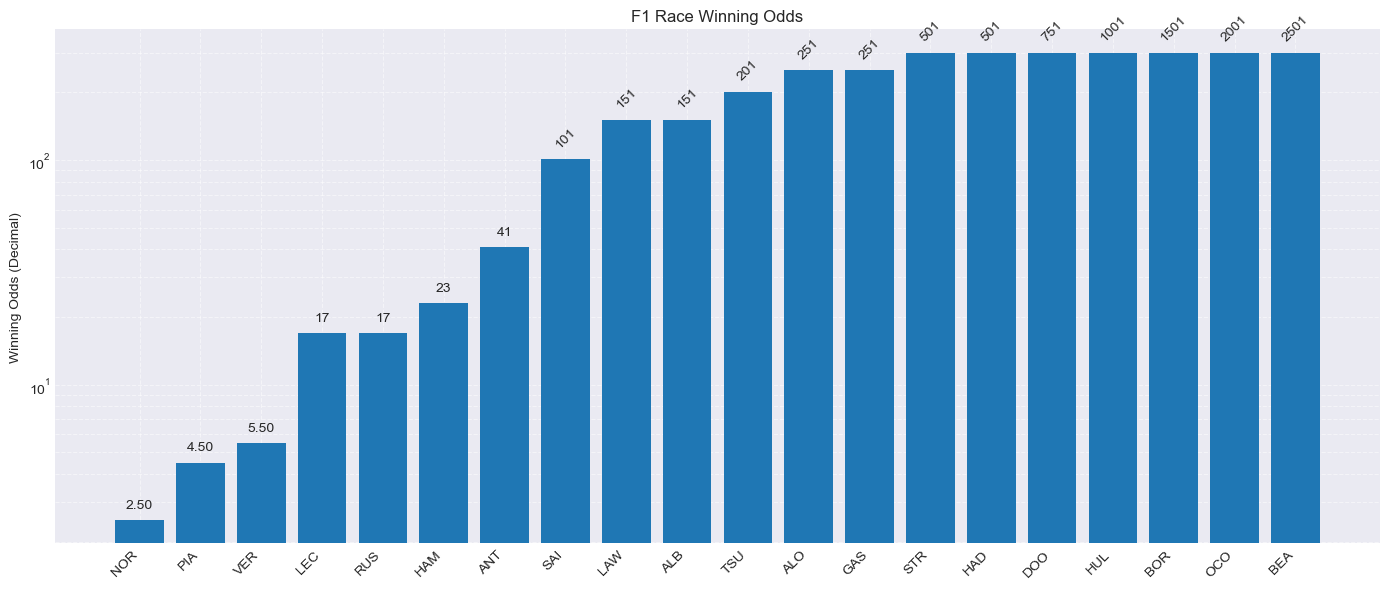

In [9]:
# Visualize the odds
plt.figure(figsize=(14, 6))
drivers = list(race_winning_odds.keys())
odds = [race_winning_odds[d] for d in drivers]

# Sort by odds for better visualization
sorted_indices = np.argsort(odds)
sorted_drivers = [drivers[i] for i in sorted_indices]
sorted_odds = [odds[i] for i in sorted_indices]

# Truncate the very large odds for visualization
display_odds = [min(o, 300) for o in sorted_odds]

# Create bar chart
bars = plt.bar(sorted_drivers, display_odds)
plt.yscale("log")  # Use log scale for better visualization
plt.ylabel("Winning Odds (Decimal)")
plt.title("F1 Race Winning Odds")
plt.xticks(rotation=45, ha="right")
plt.grid(True, which="both", linestyle="--", alpha=0.5)

# Annotate bars with actual odds
for i, bar in enumerate(bars):
    odds_text = (
        f"{sorted_odds[i]:.0f}" if sorted_odds[i] >= 10 else f"{sorted_odds[i]:.2f}"
    )
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() * 1.1,
        odds_text,
        ha="center",
        va="bottom",
        rotation=45 if sorted_odds[i] > 100 else 0,
    )

plt.tight_layout()
plt.show()

In [10]:
registry = DistributionRegistry()

# Then use the factory to populate the registry with distributions
# based on the winning odds
DistributionFactory.register_structured_odds(
    registry=registry,
    odds_structure={
        "sprint": {
            1: sprint_winning_odds,  # Win probabilities for sprint race
            3: sprint_podium_odds,  # Podium (top 3) probabilities for sprint race
            6: sprint_top6_odds,  # Top 6 finish probabilities for sprint race
            8: sprint_top8_odds,  # Top 8 finish probabilities for sprint race
        },
        "race": {
            1: race_winning_odds,  # Win probabilities for main race
            3: race_podium_odds,  # Podium probabilities for main race
            6: race_top6_odds,  # Top 6 finish probabilities for main race
            10: race_top10_odds,  # Top 10 finish probabilities for main race
        },
        "qualifying": {
            1: qualifying_win_odds  # Qualifying pole position probabilities
        },
    },
    method="cumulative",
)

In [11]:
grid_distributions = registry.distributions

In [15]:
# Print the implied win probabilities for the top drivers
print("Win probabilities derived from betting odds:")
for driver in sorted(
    grid_distributions.keys(),
    key=lambda d: grid_distributions[d]["race"][1],
    reverse=True,
)[:5]:
    print(
        f"{driver}: {grid_distributions[driver]['race'][1]:.4f} ({grid_distributions[driver]['race'][1] * 100:.1f}%)"
    )

# Print a sample of the grid distribution for a top driver
print("\nSample grid distribution for NOR:")
for pos in range(1, 6):
    print(
        f"P{pos}: {grid_distributions['NOR']['race'][pos]:.4f} ({grid_distributions['NOR']['race'][pos] * 100:.1f}%)"
    )

# And for a midfield driver
print("\nSample grid distribution for ALO:")
for pos in range(8, 16):
    print(
        f"P{pos}: {grid_distributions['ALO']['race'][pos]:.4f} ({grid_distributions['ALO']['race'][pos] * 100:.1f}%)"
    )

Win probabilities derived from betting odds:
NOR: 0.4220 (42.2%)
PIA: 0.2344 (23.4%)
VER: 0.1936 (19.4%)
RUS: 0.0632 (6.3%)
LEC: 0.0626 (6.3%)

Sample grid distribution for NOR:
P1: 0.4220 (42.2%)
P2: 0.1938 (19.4%)
P3: 0.1292 (12.9%)
P4: 0.0721 (7.2%)
P5: 0.0577 (5.8%)

Sample grid distribution for ALO:
P8: 0.2084 (20.8%)
P9: 0.1853 (18.5%)
P10: 0.1667 (16.7%)
P11: 0.0000 (0.0%)
P12: 0.0000 (0.0%)
P13: 0.0000 (0.0%)
P14: 0.0000 (0.0%)
P15: 0.0000 (0.0%)


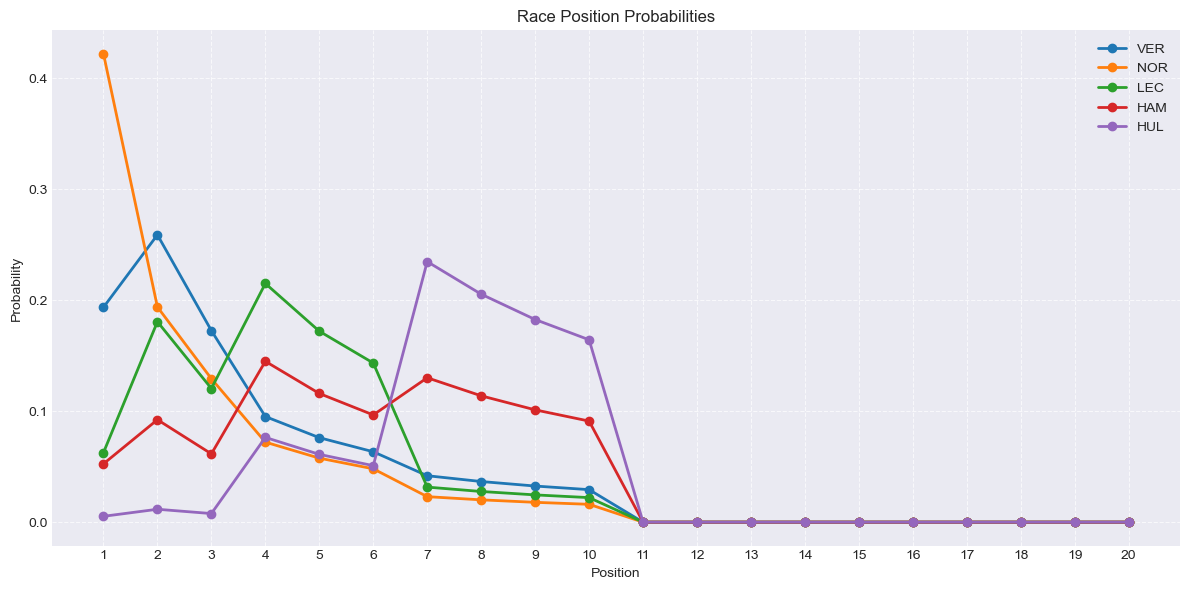

In [14]:
# Visualize a few drivers' distributions
def plot_position_distributions(drivers_to_plot):
    plt.figure(figsize=(12, 6))
    for driver_id in drivers_to_plot:
        probs = registry.get(driver_id, "race")
        positions = sorted(probs.position_probs.keys())
        probabilities = [probs.position_probs[pos] for pos in positions]
        plt.plot(positions, probabilities, marker="o", linewidth=2, label=driver_id)

    plt.title("Race Position Probabilities")
    plt.xlabel("Position")
    plt.ylabel("Probability")
    plt.xticks(range(1, 21))
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Plot top drivers
plot_position_distributions(["VER", "NOR", "LEC", "HAM", "HUL"])

In [15]:
config = ScoringConfig.default()

# We'll be using a standard race format
race_format = RaceFormat.SPRINT

## 3. Understanding the Scoring System and Expected Points

GridRival Fantasy F1 uses a comprehensive scoring system that rewards various aspects of driver and constructor performance. Let's explore how the `Scorer` and `ExpectedPointsCalculator` components work to calculate fantasy points.

### Scoring Components

The GridRival scoring system includes several components:

In [16]:
# Let's examine the scoring components in more detail
print("Qualifying points:")
for pos in range(1, 21):
    print(f"P{pos}: {config.qualifying_points[pos]} points")

print("\nRace points:")
for pos in range(1, 6):
    print(f"P{pos}: {config.race_points[pos]} points")

print("\nSprint points:")
for pos in range(1, 9):
    print(f"P{pos}: {config.sprint_points[pos]} points")

print("\nAdditional scoring components:")
print(f"Overtake multiplier: {config.overtake_multiplier} points per position gained")
print(
    f"Completion stage points: {config.completion_stage_points} points per stage (25%, 50%, 75%, 90%)"
)

print("\nImprovement points (vs. 8-race rolling average):")
for pos, points in sorted(config.improvement_points.items()):
    print(f"{pos} position(s) ahead: {points} points")

print("\nBeating teammate points:")
for threshold, points in sorted(config.teammate_points.items()):
    if threshold == list(config.teammate_points.keys())[-1]:
        print(f">{threshold - 1} positions ahead: {points} points")
    else:
        next_threshold = sorted(config.teammate_points.keys())[
            sorted(config.teammate_points.keys()).index(threshold) + 1
        ]

Qualifying points:
P1: 50 points
P2: 48 points
P3: 46 points
P4: 44 points
P5: 42 points
P6: 40 points
P7: 38 points
P8: 36 points
P9: 34 points
P10: 32 points
P11: 30 points
P12: 28 points
P13: 26 points
P14: 24 points
P15: 22 points
P16: 20 points
P17: 18 points
P18: 16 points
P19: 14 points
P20: 12 points

Race points:
P1: 100 points
P2: 97 points
P3: 94 points
P4: 91 points
P5: 88 points

Sprint points:
P1: 8 points
P2: 7 points
P3: 6 points
P4: 5 points
P5: 4 points
P6: 3 points
P7: 2 points
P8: 1 points

Additional scoring components:
Overtake multiplier: 3.0 points per position gained
Completion stage points: 3.0 points per stage (25%, 50%, 75%, 90%)

Improvement points (vs. 8-race rolling average):
1 position(s) ahead: 2 points
2 position(s) ahead: 4 points
3 position(s) ahead: 6 points
4 position(s) ahead: 9 points
5 position(s) ahead: 12 points
6 position(s) ahead: 16 points
7 position(s) ahead: 20 points
8 position(s) ahead: 25 points
9 position(s) ahead: 30 points

Beating 

In [17]:
# Create the calculator
points_calculator = PointsCalculator(
    scorer=ScoringCalculator(),
    probability_registry=registry,
    driver_stats=rolling_averages,
)

In [18]:
# Calculate expected points for all drivers
driver_expected_points = {}
driver_points_breakdown = {}

for driver_id in driver_salaries.keys():
    # Calculate points for standard race format
    points_breakdown = points_calculator.calculate_driver_points(
        driver_id, race_format=race_format
    )

    # Sum up all point components
    total_points = sum(points_breakdown.values())

    # Store results
    driver_expected_points[driver_id] = total_points
    driver_points_breakdown[driver_id] = points_breakdown

In [19]:
# Sort drivers by expected points
sorted_drivers = sorted(
    driver_expected_points.keys(), key=lambda d: driver_expected_points[d], reverse=True
)

In [20]:
# Print expected points for all drivers
print("Expected fantasy points for drivers (standard race):")
print(f"{'Driver':<5} {'Total Points':<12} {'Breakdown'}")
print("-" * 80)

for driver_id in sorted_drivers:
    breakdown = driver_points_breakdown[driver_id]
    breakdown_str = " + ".join([f"{k}: {v:.1f}" for k, v in breakdown.items()])
    print(f"{driver_id:<5} {driver_expected_points[driver_id]:<12.1f} {breakdown_str}")

Expected fantasy points for drivers (standard race):
Driver Total Points Breakdown
--------------------------------------------------------------------------------
BOR   169.4        qualifying: 18.5 + race: 79.6 + sprint: 2.3 + overtake: 27.1 + teammate: 0.4 + completion: 11.6 + improvement: 30.0
DOO   167.8        qualifying: 19.3 + race: 79.2 + sprint: 1.9 + overtake: 25.5 + teammate: 0.3 + completion: 11.6 + improvement: 30.0
PIA   167.4        qualifying: 45.3 + race: 93.5 + sprint: 6.0 + overtake: 3.7 + teammate: 0.4 + completion: 11.6 + improvement: 6.8
STR   166.0        qualifying: 25.1 + race: 80.4 + sprint: 2.6 + overtake: 18.3 + teammate: 0.5 + completion: 11.6 + improvement: 27.4
HUL   165.3        qualifying: 20.3 + race: 80.4 + sprint: 2.5 + overtake: 25.1 + teammate: 0.5 + completion: 11.6 + improvement: 24.8
HAD   164.5        qualifying: 23.9 + race: 79.8 + sprint: 2.2 + overtake: 19.4 + teammate: 0.4 + completion: 11.6 + improvement: 27.1
BEA   164.4        qualifyin

In [33]:
f"{odds['race'].position_probs[1] * 100:0.2f}%"

'23.44%'

In [37]:
for driver, odds in grid_distributions.items():
    print(
        driver
        + ":"
        + ",".join(
            [
                f"{pos}: {prob * 100:0.2f}%"
                for pos, prob in odds["race"].position_probs.items()
            ]
        )
    )

PIA:1: 23.44%,2: 26.94%,3: 17.96%,4: 9.10%,5: 7.28%,6: 6.06%,7: 2.75%,8: 2.41%,9: 2.14%,10: 1.92%,11: 0.00%,12: 0.00%,13: 0.00%,14: 0.00%,15: 0.00%,16: 0.00%,17: 0.00%,18: 0.00%,19: 0.00%,20: 0.00%
ALB:1: 0.97%,2: 2.58%,3: 1.72%,4: 18.55%,5: 14.84%,6: 12.36%,7: 14.61%,8: 12.78%,9: 11.36%,10: 10.23%,11: 0.00%,12: 0.00%,13: 0.00%,14: 0.00%,15: 0.00%,16: 0.00%,17: 0.00%,18: 0.00%,19: 0.00%,20: 0.00%
TSU:1: 0.86%,2: 2.84%,3: 1.89%,4: 6.92%,5: 5.53%,6: 4.61%,7: 23.07%,8: 20.19%,9: 17.94%,10: 16.15%,11: 0.00%,12: 0.00%,13: 0.00%,14: 0.00%,15: 0.00%,16: 0.00%,17: 0.00%,18: 0.00%,19: 0.00%,20: 0.00%
STR:1: 0.96%,2: 2.76%,3: 1.84%,4: 5.59%,5: 4.48%,6: 3.73%,7: 24.05%,8: 21.04%,9: 18.71%,10: 16.83%,11: 0.00%,12: 0.00%,13: 0.00%,14: 0.00%,15: 0.00%,16: 0.00%,17: 0.00%,18: 0.00%,19: 0.00%,20: 0.00%
LEC:1: 6.26%,2: 18.06%,3: 12.04%,4: 21.50%,5: 17.20%,6: 14.34%,7: 3.16%,8: 2.76%,9: 2.46%,10: 2.21%,11: 0.00%,12: 0.00%,13: 0.00%,14: 0.00%,15: 0.00%,16: 0.00%,17: 0.00%,18: 0.00%,19: 0.00%,20: 0.00%
VE

In [58]:
# Calculate expected points for all constructors
constructor_expected_points = {}
constructor_points_breakdown = {}

for constructor_id in constructor_salaries.keys():
    # Calculate points for standard race format
    points_breakdown = points_calculator.calculate_constructor_points(
        constructor_id, race_format=race_format
    )

    # Sum up all point components
    total_points = sum(points_breakdown.values())

    # Store results
    constructor_expected_points[constructor_id] = total_points
    constructor_points_breakdown[constructor_id] = points_breakdown

In [59]:
# Sort constructors by expected points
sorted_constructors = sorted(
    constructor_expected_points.keys(),
    key=lambda c: constructor_expected_points[c],
    reverse=True,
)

In [60]:
# Print expected points for all constructors
print("\nExpected fantasy points for constructors (standard race):")
print(f"{'Constructor':<5} {'Total Points':<12} {'Breakdown'}")
print("-" * 80)

for constructor_id in sorted_constructors:
    breakdown = constructor_points_breakdown[constructor_id]
    breakdown_str = " + ".join([f"{k}: {v:.1f}" for k, v in breakdown.items()])
    print(
        f"{constructor_id:<5} {constructor_expected_points[constructor_id]:<12.1f} {breakdown_str}"
    )


Expected fantasy points for constructors (standard race):
Constructor Total Points Breakdown
--------------------------------------------------------------------------------
MCL   164.5        qualifying: 54.8 + race: 109.6
FER   162.4        qualifying: 54.1 + race: 108.3
RBR   148.8        qualifying: 49.6 + race: 99.2
MER   145.7        qualifying: 48.6 + race: 97.1
WIL   121.6        qualifying: 40.5 + race: 81.1
AST   105.1        qualifying: 35.0 + race: 70.0
ALP   104.3        qualifying: 34.8 + race: 69.5
RBU   102.6        qualifying: 34.2 + race: 68.4
HAA   92.1         qualifying: 30.7 + race: 61.4
SAU   83.0         qualifying: 27.7 + race: 55.3


In [61]:
# Calculate points per million for drivers
driver_value = {}
for driver_id in driver_salaries.keys():
    salary = driver_salaries[driver_id]
    expected_points = driver_expected_points[driver_id]
    value = expected_points / salary
    driver_value[driver_id] = value

# Calculate points per million for constructors
constructor_value = {}
for constructor_id in constructor_salaries.keys():
    salary = constructor_salaries[constructor_id]
    expected_points = constructor_expected_points[constructor_id]
    value = expected_points / salary
    constructor_value[constructor_id] = value

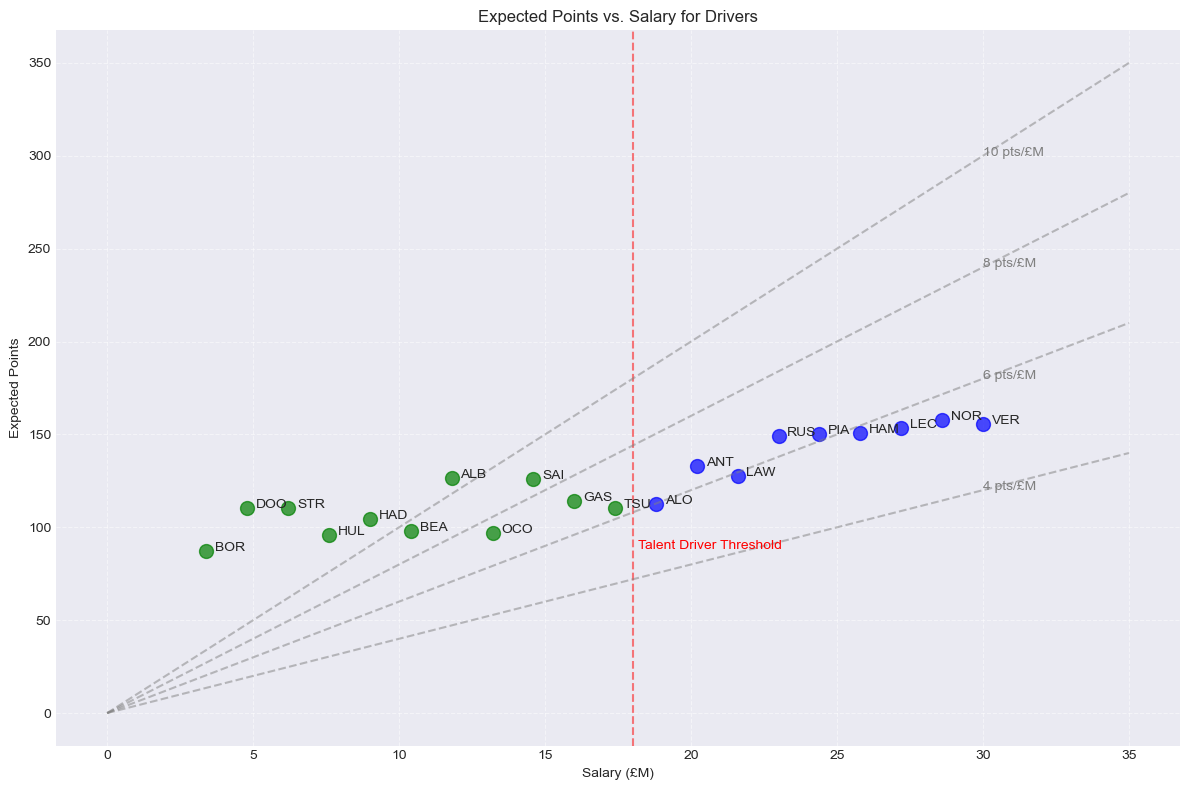

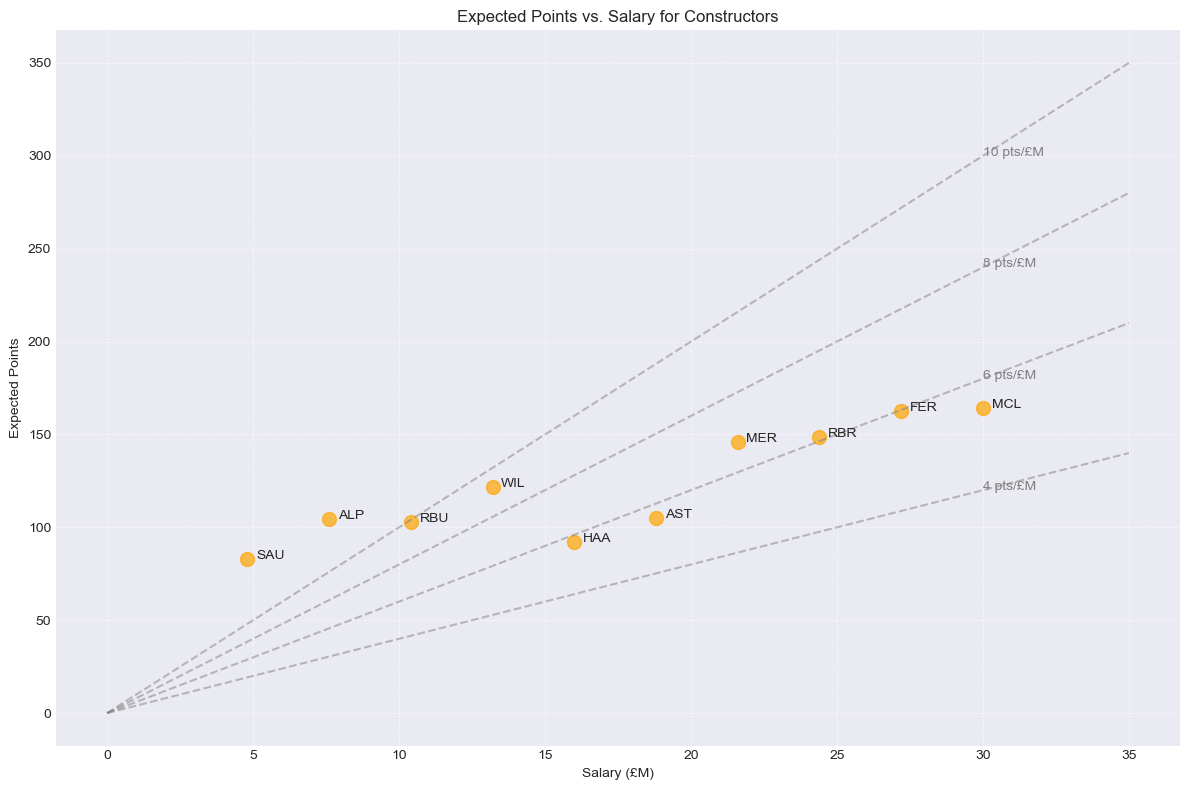

In [62]:
# Create a visualization of points vs. cost for drivers
plt.figure(figsize=(12, 8))

# Create scatter plot of drivers
for driver_id in driver_salaries.keys():
    salary = driver_salaries[driver_id]
    points = driver_expected_points[driver_id]

    # Determine if eligible for talent driver (salary <= 18M)
    color = "green" if salary <= 18.0 else "blue"

    plt.scatter(salary, points, s=100, color=color, alpha=0.7)
    plt.text(salary + 0.3, points, driver_id)

# Add talent driver threshold line
plt.axvline(x=18.0, color="red", linestyle="--", alpha=0.5)
plt.text(18.2, plt.ylim()[0] + 5, "Talent Driver Threshold", color="red")

# Add diagonal lines representing equal value (points/salary)
x_range = np.array([0, 35])
for value in [4, 6, 8, 10]:
    plt.plot(x_range, value * x_range, color="gray", linestyle="--", alpha=0.5)
    plt.text(30, value * 30, f"{value} pts/£M", color="gray")

plt.title("Expected Points vs. Salary for Drivers")
plt.xlabel("Salary (£M)")
plt.ylabel("Expected Points")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Create a visualization of points vs. cost for constructors
plt.figure(figsize=(12, 8))

# Create scatter plot of constructors
for constructor_id in constructor_salaries.keys():
    salary = constructor_salaries[constructor_id]
    points = constructor_expected_points[constructor_id]

    plt.scatter(salary, points, s=100, color="orange", alpha=0.7)
    plt.text(salary + 0.3, points, constructor_id)

# Add diagonal lines representing equal value (points/salary)
x_range = np.array([0, 35])
for value in [4, 6, 8, 10]:
    plt.plot(x_range, value * x_range, color="gray", linestyle="--", alpha=0.5)
    plt.text(30, value * 30, f"{value} pts/£M", color="gray")

plt.title("Expected Points vs. Salary for Constructors")
plt.xlabel("Salary (£M)")
plt.ylabel("Expected Points")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [63]:
# Create a table of top value drivers and constructors
def print_value_table(elements, salaries, points, values, element_type, n=10):
    print(f"\nTop {n} {element_type}s by value (points per £M):")
    print(f"{'ID':<5} {'Salary (£M)':<12} {'Expected Pts':<12} {'Value (pts/£M)':<15}")
    print("-" * 50)

    # Sort by value
    sorted_elements = sorted(elements.keys(), key=lambda e: values[e], reverse=True)

    for element_id in sorted_elements[:n]:
        print(
            f"{element_id:<5} {salaries[element_id]:<12.1f} {points[element_id]:<12.1f} {values[element_id]:<15.2f}"
        )


# Print value tables
print_value_table(
    driver_salaries, driver_salaries, driver_expected_points, driver_value, "driver"
)
print_value_table(
    constructor_salaries,
    constructor_salaries,
    constructor_expected_points,
    constructor_value,
    "constructor",
)


Top 10 drivers by value (points per £M):
ID    Salary (£M)  Expected Pts Value (pts/£M) 
--------------------------------------------------
BOR   3.4          87.0         25.59          
DOO   4.8          110.4        23.00          
STR   6.2          110.2        17.78          
HUL   7.6          95.6         12.58          
HAD   9.0          104.7        11.63          
ALB   11.8         126.4        10.71          
BEA   10.4         98.2         9.44           
SAI   14.6         125.9        8.62           
OCO   13.2         96.7         7.33           
GAS   16.0         114.0        7.13           

Top 10 constructors by value (points per £M):
ID    Salary (£M)  Expected Pts Value (pts/£M) 
--------------------------------------------------
SAU   4.8          83.0         17.30          
ALP   7.6          104.3        13.72          
RBU   10.4         102.6        9.87           
WIL   13.2         121.6        9.21           
MER   21.6         145.7        6.75     

In [64]:
# Identify eligible talent drivers (salary <= 18M)
eligible_talent_drivers = {
    d: driver_expected_points[d] for d in driver_salaries if driver_salaries[d] <= 18.0
}

# Sort by expected points
sorted_talent_drivers = sorted(
    eligible_talent_drivers.keys(),
    key=lambda d: eligible_talent_drivers[d],
    reverse=True,
)

print("\nBest talent driver candidates:")
print(
    f"{'Driver':<5} {'Salary (£M)':<12} {'Expected Pts':<12} {'Value (pts/£M)':<15} {'Doubled Pts':<12}"
)
print("-" * 75)

for driver_id in sorted_talent_drivers:
    salary = driver_salaries[driver_id]
    points = driver_expected_points[driver_id]
    value = driver_value[driver_id]
    doubled_points = points * 2

    print(
        f"{driver_id:<5} {salary:<12.1f} {points:<12.1f} {value:<15.2f} {doubled_points:<12.1f}"
    )


Best talent driver candidates:
Driver Salary (£M)  Expected Pts Value (pts/£M)  Doubled Pts 
---------------------------------------------------------------------------
ALB   11.8         126.4        10.71           252.7       
SAI   14.6         125.9        8.62            251.8       
GAS   16.0         114.0        7.13            228.1       
DOO   4.8          110.4        23.00           220.8       
TSU   17.4         110.4        6.34            220.7       
STR   6.2          110.2        17.78           220.5       
HAD   9.0          104.7        11.63           209.3       
BEA   10.4         98.2         9.44            196.3       
OCO   13.2         96.7         7.33            193.5       
HUL   7.6          95.6         12.58           191.3       
BOR   3.4          87.0         25.59           174.0       


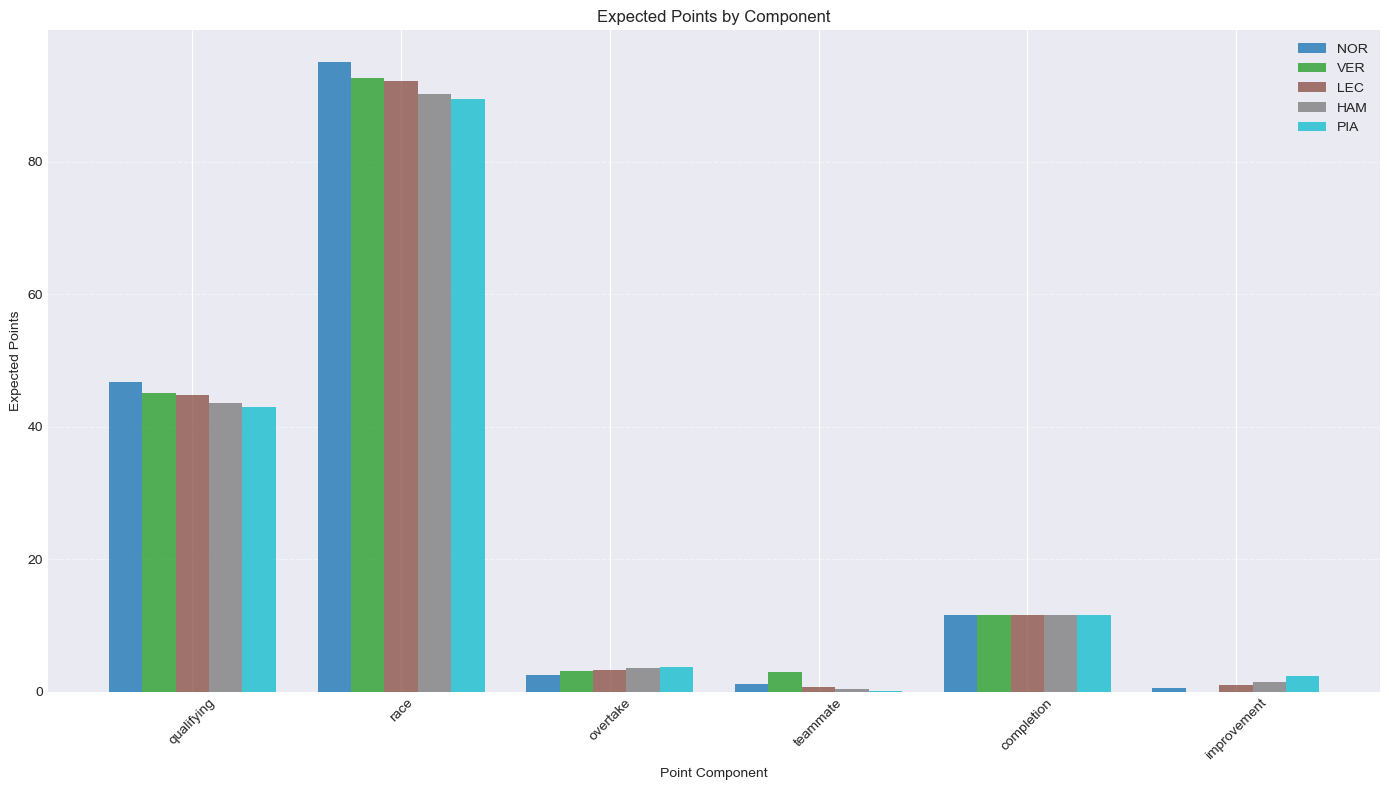

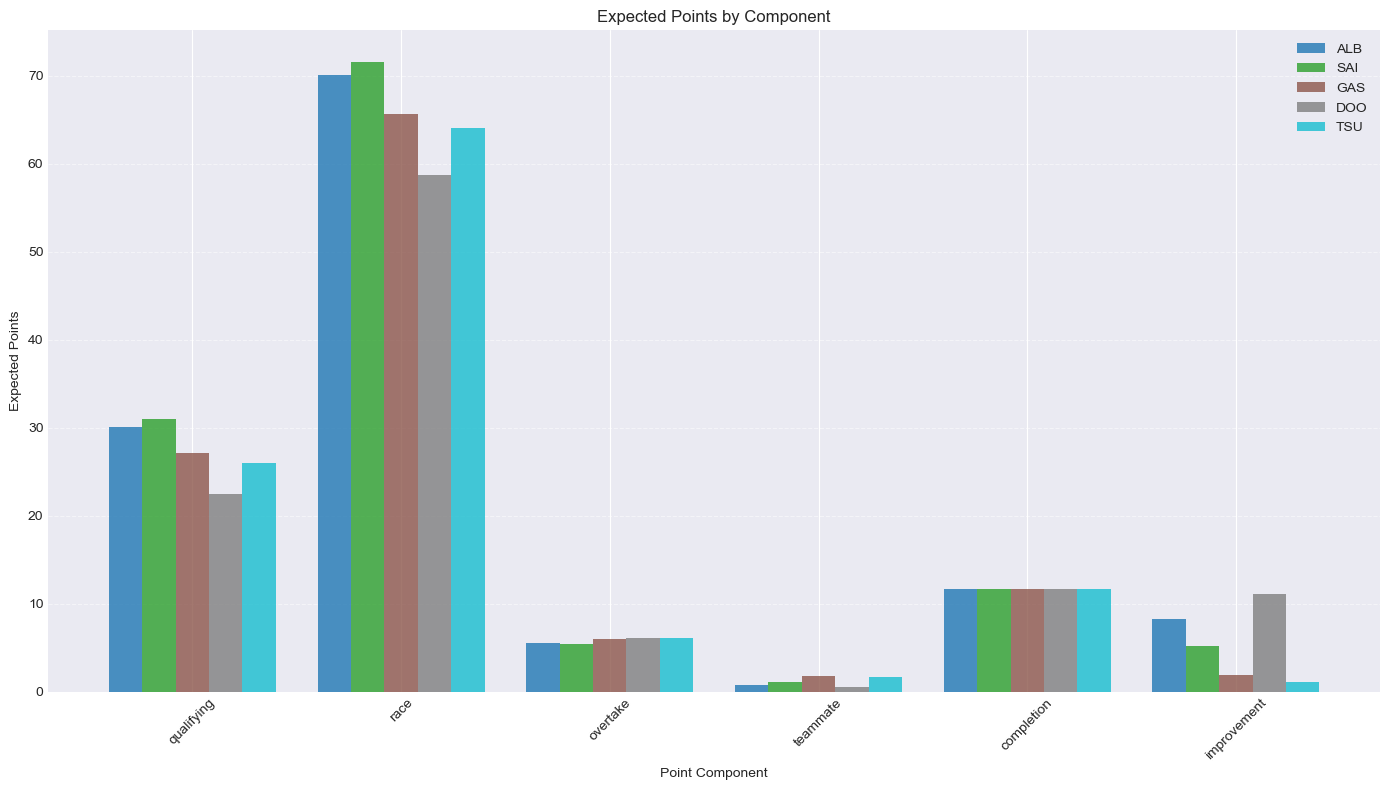

In [65]:
# Analyze point components for selected drivers
def analyze_point_components(driver_ids):
    plt.figure(figsize=(14, 8))

    # Component labels
    components = [
        "qualifying",
        "race",
        "overtake",
        "teammate",
        "completion",
        "improvement",
    ]

    # Set bar width based on number of drivers
    bar_width = 0.8 / len(driver_ids)

    # Setup colors for different drivers
    colors = plt.cm.tab10(np.linspace(0, 1, len(driver_ids)))

    # Setup positions for bars
    positions = np.arange(len(components))

    # Plot bars for each driver
    for i, driver_id in enumerate(driver_ids):
        breakdown = driver_points_breakdown[driver_id]

        # Extract values for each component, default to 0 if not present
        values = [breakdown.get(comp, 0) for comp in components]

        # Calculate position offset for this driver's bars
        offset = i * bar_width - (len(driver_ids) - 1) * bar_width / 2

        # Plot the bars
        plt.bar(
            positions + offset,
            values,
            bar_width,
            label=driver_id,
            color=colors[i],
            alpha=0.8,
        )

    # Add labels and legend
    plt.xlabel("Point Component")
    plt.ylabel("Expected Points")
    plt.title("Expected Points by Component")
    plt.xticks(positions, components, rotation=45)
    plt.legend()
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


# Analyze top drivers
analyze_point_components(sorted_drivers[:5])

# Analyze highly-ranked talent driver options
analyze_point_components(sorted_talent_drivers[:5])

## 4. Team Optimization

Now that we have calculated expected points for all drivers and constructors, we can optimize our team composition to maximize total expected points while staying within budget constraints.

### Setting Up the Team Optimizer

GridRival AI provides the `TeamOptimizer` class to handle the complexity of finding the optimal team. Let's set it up:



In [67]:
# Create the team optimizer
optimizer = TeamOptimizer(
    league_data=fantasy_data,
    points_calculator=points_calculator,
    probability_registry=registry,
    driver_stats=rolling_averages,
)

# Run the optimization
optimization_result = optimizer.optimize()

In [68]:
# Check if a valid solution was found
if optimization_result.best_solution:
    print("Optimization successful!")
    print(f"Expected points: {optimization_result.best_solution.expected_points:.1f}")
    print(f"Total cost: £{optimization_result.best_solution.total_cost:.1f}M")
    print(f"Remaining budget: £{optimization_result.remaining_budget:.1f}M")
else:
    print(f"Optimization failed: {optimization_result.error_message}")

Optimization successful!
Expected points: 935.5
Total cost: £98.8M
Remaining budget: £1.2M


In [82]:
# Helper function to display team details
def display_team(solution):
    """Display details of a team solution."""
    if not solution:
        print("No valid solution found")
        return

    # Setup data for tabular display
    data = []

    # Add driver data
    for driver_id in solution.drivers:
        points = sum(solution.points_breakdown[driver_id].values())
        is_talent = driver_id == solution.talent_driver
        salary = driver_salaries[driver_id]

        # Format for display
        talent_marker = " (Talent)" if is_talent else ""
        points_display = f"{points:.1f}" if not is_talent else f"{points:.1f} (doubled)"

        data.append([f"{driver_id}{talent_marker}", f"£{salary:.1f}M", points_display])

    # Add constructor data
    constructor_id = solution.constructor
    constructor_points = sum(list(solution.points_breakdown[constructor_id].values()))
    constructor_salary = constructor_salaries[constructor_id]

    data.append(
        [
            f"{constructor_id} (Constructor)",
            f"£{constructor_salary:.1f}M",
            f"{constructor_points:.1f}",
        ]
    )

    # Add total row
    data.append(
        ["TOTAL", f"£{solution.total_cost:.1f}M", f"{solution.expected_points:.1f}"]
    )

    # Print table
    print(f"{'Element':<20} {'Salary':<10} {'Expected Points':<20}")
    print("-" * 50)
    for row in data:
        print(f"{row[0]:<20} {row[1]:<10} {row[2]:<20}")

In [83]:
# Display the optimal team
print("\nOPTIMAL TEAM COMPOSITION:")
display_team(optimization_result.best_solution)


OPTIMAL TEAM COMPOSITION:
Element              Salary     Expected Points     
--------------------------------------------------
DOO                  £4.8M      110.4               
RUS                  £23.0M     149.0               
HAM                  £25.8M     150.9               
ALB (Talent)         £11.8M     252.7 (doubled)     
STR                  £6.2M      110.2               
FER (Constructor)    £27.2M     162.4               
TOTAL                £98.8M     935.5               


In [84]:
# Analyze point breakdown for the optimal team
if optimization_result.best_solution:
    print("\nPoint breakdown by element:")
    for element_id in list(optimization_result.best_solution.drivers) + [
        optimization_result.best_solution.constructor
    ]:
        breakdown = optimization_result.best_solution.points_breakdown[element_id]
        if isinstance(breakdown, float):
            continue
        total = sum(breakdown.values())

        # Apply talent driver bonus in display
        is_talent = element_id == optimization_result.best_solution.talent_driver
        if is_talent:
            total_note = f" (doubled from {total / 2:.1f})"
        else:
            total_note = ""

        print(f"\n{element_id}: {total:.1f} points{total_note}")
        for component, points in breakdown.items():
            component_display = points
            if is_talent:
                component_display = points / 2
            print(f"  - {component}: {component_display:.1f}")


Point breakdown by element:

DOO: 110.4 points
  - qualifying: 22.4
  - race: 58.7
  - overtake: 6.1
  - teammate: 0.5
  - completion: 11.6
  - improvement: 11.1

RUS: 149.0 points
  - qualifying: 41.5
  - race: 87.2
  - overtake: 3.9
  - teammate: 1.7
  - completion: 11.6
  - improvement: 2.9

HAM: 150.9 points
  - qualifying: 43.5
  - race: 90.3
  - overtake: 3.6
  - teammate: 0.4
  - completion: 11.6
  - improvement: 1.5

ALB: 252.7 points (doubled from 126.4)
  - qualifying: 30.0
  - race: 70.0
  - overtake: 5.6
  - teammate: 0.8
  - completion: 11.6
  - improvement: 8.3

STR: 110.2 points
  - qualifying: 23.0
  - race: 59.5
  - overtake: 6.1
  - teammate: 0.6
  - completion: 11.6
  - improvement: 9.5

FER: 162.4 points
  - qualifying: 54.1
  - race: 108.3


In [85]:
# Create a pie chart showing the contribution of each element to the total points
def plot_team_contributions(solution):
    """Plot pie chart of points contribution by team element."""
    if not solution:
        return

    # Get points and labels
    labels = []
    points = []

    # Add drivers
    for driver_id in solution.drivers:
        element_points = sum(solution.points_breakdown[driver_id].values())
        talent_marker = " (Talent)" if driver_id == solution.talent_driver else ""
        labels.append(f"{driver_id}{talent_marker}")
        points.append(element_points)

    # Add constructor
    constructor_id = solution.constructor
    constructor_points = sum(solution.points_breakdown[constructor_id].values())
    labels.append(f"{constructor_id} (Constructor)")
    points.append(constructor_points)

    # Create pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(
        points,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.tab10(np.linspace(0, 1, len(labels))),
    )
    plt.axis("equal")
    plt.title("Expected Points Contribution by Team Element")
    plt.tight_layout()
    plt.show()

In [86]:
# Create a bar chart showing points by component for the whole team
def plot_team_components(solution):
    """Plot bar chart of points by component for the whole team."""
    if not solution:
        return

    # Initialize component totals
    components = {
        "qualifying": 0,
        "race": 0,
        "overtake": 0,
        "teammate": 0,
        "completion": 0,
        "improvement": 0,
        "constructor": 0,
    }

    # Sum up driver components
    for driver_id in solution.drivers:
        for component, points in solution.points_breakdown[driver_id].items():
            if component in components:
                components[component] += points

    # Add constructor points (combine qualifying and race into 'constructor' component)
    constructor_id = solution.constructor
    constructor_points = solution.points_breakdown[constructor_id]
    components["constructor"] = sum(constructor_points.values())

    # Remove constructor from other components to avoid double counting
    for component in ["qualifying", "race"]:
        if component in constructor_points:
            components[component] = 0

    # Create bar chart
    plt.figure(figsize=(12, 6))
    bar_positions = np.arange(len(components))
    bars = plt.bar(bar_positions, components.values(), color="skyblue")

    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 5,
            f"{height:.1f}",
            ha="center",
            va="bottom",
        )

    plt.xticks(bar_positions, components.keys(), rotation=45)
    plt.title("Expected Points by Component for Optimal Team")
    plt.ylabel("Expected Points")
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

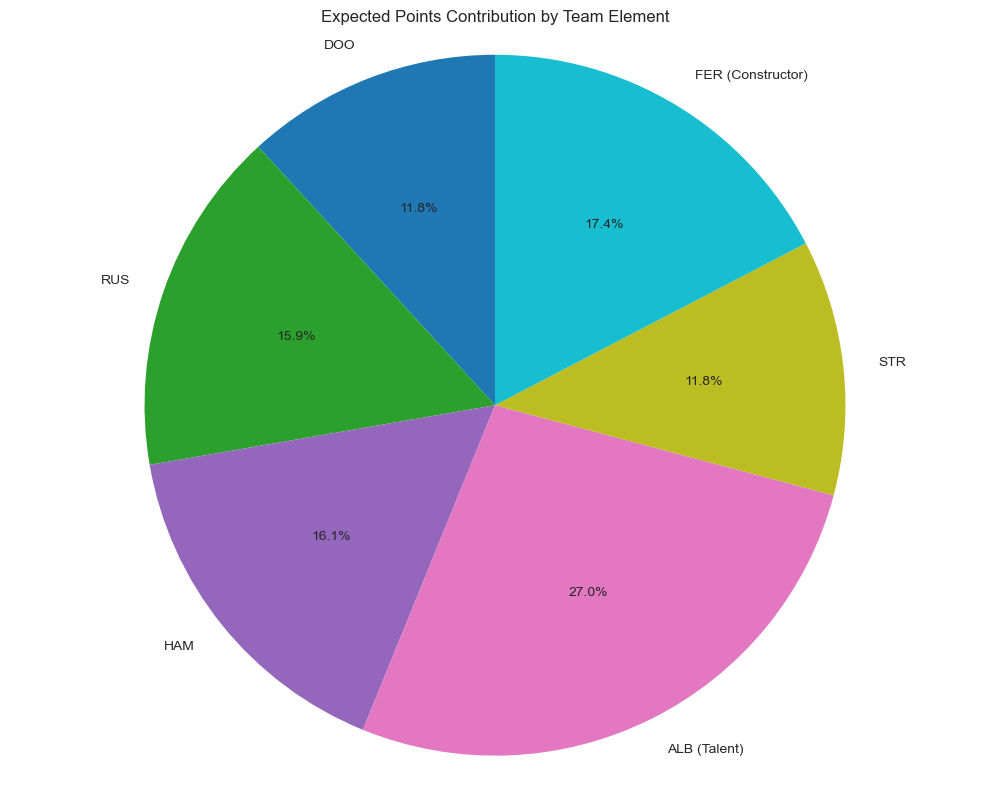

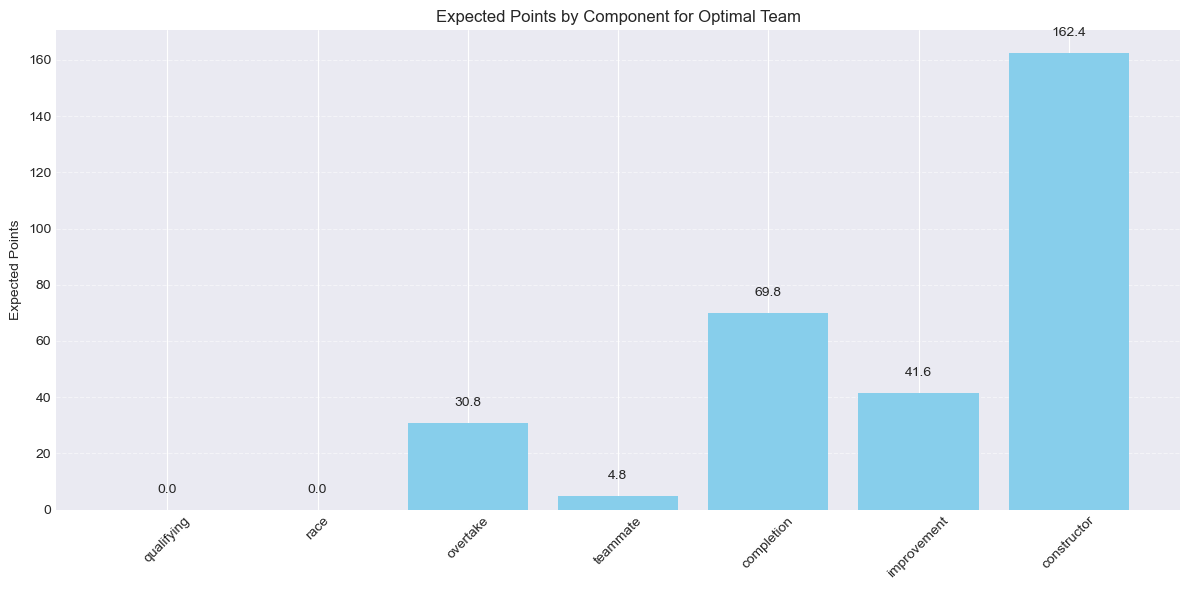

In [87]:
plot_team_contributions(optimization_result.best_solution)
plot_team_components(optimization_result.best_solution)

In [88]:
# Check if there are alternative solutions
if optimization_result.alternative_solutions:
    print(
        f"\nFound {len(optimization_result.alternative_solutions)} alternative solutions with similar expected points."
    )

    # Display alternative solutions
    for i, solution in enumerate(optimization_result.alternative_solutions):
        print(f"\nALTERNATIVE SOLUTION #{i + 1}:")
        display_team(solution)
        print(f"Expected points: {solution.expected_points:.1f}")
        print(f"Total cost: £{solution.total_cost:.1f}M")
else:
    print("\nNo alternative solutions found with similar expected points.")


No alternative solutions found with similar expected points.
